In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn import metrics
%matplotlib inline
import warnings;
warnings.filterwarnings('ignore');

## Importing Data

In [4]:
dataset= pd.read_csv('Social_Network_Ads.csv')

dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [6]:
dataset.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User ID,400.0,NaN,NaN,NaN,15691539.7575,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Gender,400,2,Female,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,400.0,NaN,NaN,NaN,37.655,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,NaN,NaN,NaN,69742.5,34096.960282,15000.0,43000.0,70000.0,88000.0,150000.0
Purchased,400.0,NaN,NaN,NaN,0.3575,0.479864,0.0,0.0,0.0,1.0,1.0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### Finding Correlation between features

In [8]:
dataset.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


<AxesSubplot:>

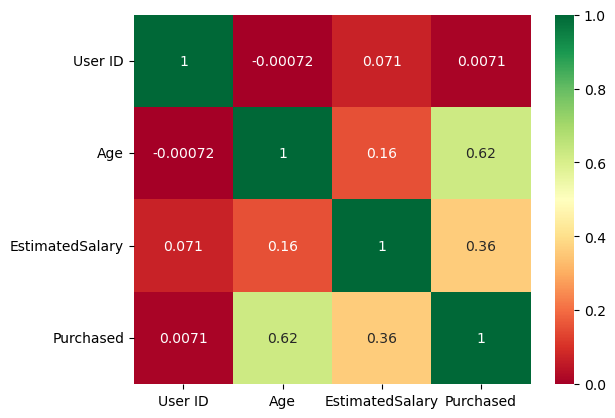

In [9]:
sns.heatmap(dataset.corr(), annot= True, cmap ='RdYlGn')

In [10]:
dataset.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [11]:
dataset.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [12]:
# For checking class balance

dataset['Purchased'].value_counts(normalize= True)

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

In [13]:
# Checking for only Male

dataset[dataset.Gender=='Male']['Purchased'].value_counts(normalize= True)

0    0.663265
1    0.336735
Name: Purchased, dtype: float64

In [14]:
# Checking for only Female

dataset[dataset.Gender=='Female']['Purchased'].value_counts(normalize= True)

0    0.622549
1    0.377451
Name: Purchased, dtype: float64

### Extracting variables

In [15]:
X= dataset[['Age', 'EstimatedSalary']]
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [16]:
Y= dataset.iloc[  :,4].values
Y= dataset['Purchased']

Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

### Train and Test Split

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 1/3 , random_state= 32)

X_train

,Age,EstimatedSalary
164,33,69000
332,42,65000
29,31,18000
301,48,74000
72,20,23000
...,...,...
380,42,64000
310,42,70000
389,48,35000
43,30,15000


#### Feature Scalling

In [68]:
s1= StandardScaler()
X_train= s1.fit_transform(X_train)
X_test= s1.transform(X_test)

In [69]:
X_train

array([[-0.42911487, -0.03317888],
       [ 0.46419035, -0.15407724],
       [-0.62762715, -1.57463308],
       [ 1.05972717,  0.11794409],
       [-1.71944464, -1.42351012],
       [-0.03209033,  0.0574949 ],
       [ 0.76195876, -0.75856909],
       [ 0.86121489, -0.3354248 ],
       [ 1.35749557, -1.42351012],
       [-0.03209033,  0.69221134],
       [ 0.76195876, -1.33283634],
       [ 0.56344649,  1.90119503],
       [-1.22316396, -1.1212642 ],
       [ 0.06716581,  0.02727031],
       [-0.92539555, -0.45632317],
       [ 0.46419035,  0.60153756],
       [ 1.1589833 , -0.15407724],
       [ 1.65526398, -1.33283634],
       [-0.03209033,  0.02727031],
       [-1.12390783, -0.81901828],
       [ 2.2508008 , -0.84924287],
       [ 1.05972717,  0.60153756],
       [ 0.96047103, -1.09103961],
       [-0.13134647, -0.48654776],
       [ 0.76195876, -1.45373471],
       [-0.13134647, -0.54699694],
       [ 1.05972717, -1.1212642 ],
       [-1.12390783, -0.54699694],
       [-0.03209033,

#### Intantiating and fitting the model to training dataset 

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
logis_reg_model = LogisticRegression()
logis_reg_model.fit(X_train, Y_train)

LogisticRegression()

#### Data Prediction

In [72]:
Y_test_preds =  logis_reg_model.predict(X_test)
Y_train_preds = logis_reg_model.predict(X_train)

In [73]:
print('accuracy on Train-', accuracy_score(Y_train, Y_train_preds))
print('accuracy on test-', accuracy_score(Y_test, Y_test_preds))

accuracy on Train- 0.849624060150376
accuracy on test- 0.8507462686567164


In [74]:
logis_reg_model.predict(X_train).shape

(266,)

In [75]:
accuracy_score(np.array(Y_test),logis_reg_model.predict(X_test) )

0.8507462686567164

In [76]:
accuracy_score(np.array(Y_train),logis_reg_model.predict(X_train) )

0.849624060150376

In [77]:
logis_reg_model.predict(X_test)

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0], dtype=int64)

In [37]:
logis_reg_model.predict_proba(X_test)

array([[0.82672762, 0.17327238],
       [0.97776086, 0.02223914],
       [0.98844457, 0.01155543],
       [0.9714437 , 0.0285563 ],
       [0.90033718, 0.09966282],
       [0.87364638, 0.12635362],
       [0.6707052 , 0.3292948 ],
       [0.73967459, 0.26032541],
       [0.92611157, 0.07388843],
       [0.947138  , 0.052862  ],
       [0.69955672, 0.30044328],
       [0.51552759, 0.48447241],
       [0.7813354 , 0.2186646 ],
       [0.99071534, 0.00928466],
       [0.26114017, 0.73885983],
       [0.32964087, 0.67035913],
       [0.84753566, 0.15246434],
       [0.86624916, 0.13375084],
       [0.47804362, 0.52195638],
       [0.99504796, 0.00495204],
       [0.23718322, 0.76281678],
       [0.9373662 , 0.0626338 ],
       [0.67673631, 0.32326369],
       [0.71143546, 0.28856454],
       [0.75863539, 0.24136461],
       [0.9640668 , 0.0359332 ],
       [0.72249739, 0.27750261],
       [0.81012091, 0.18987909],
       [0.56900131, 0.43099869],
       [0.94273766, 0.05726234],
       [0.

## Classification Report

In [78]:
print(classification_report(Y_train, Y_train_preds))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       176
           1       0.84      0.69      0.76        90

    accuracy                           0.85       266
   macro avg       0.85      0.81      0.82       266
weighted avg       0.85      0.85      0.85       266



In [79]:
print(classification_report(Y_test, Y_test_preds))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        81
           1       0.85      0.75      0.80        53

    accuracy                           0.85       134
   macro avg       0.85      0.83      0.84       134
weighted avg       0.85      0.85      0.85       134



### Confusion Metrics

In [82]:
confusion_mat= confusion_matrix(Y_train, Y_train_preds)
confusion_mat

array([[164,  12],
       [ 28,  62]], dtype=int64)

<AxesSubplot:>

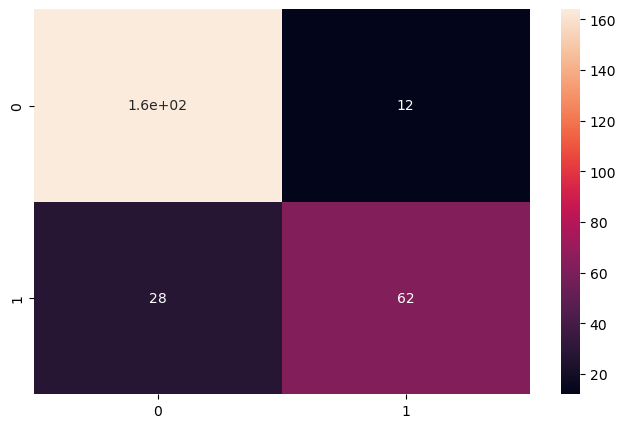

In [84]:
fig, ax= plt.subplots(figsize= (8,5))

sns.heatmap(confusion_mat, annot= True, ax=ax)